In [ ]:
!rm -rf tesis_mapeo_distribucion

In [17]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion.git

fatal: destination path 'tesis_mapeo_distribucion' already exists and is not an empty directory.


In [18]:
import sys
sys.path.append('/content/tesis_mapeo_distribucion/Final')

In [1]:
!pip install gurobipy 
!pip install umap
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 5.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=308cd008b890ca16fb200e550782d78e3367e30eaa66eb54ea8f7f73b28f5285
  Stored in directory: /home/jovyan/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.8 MB/s eta 0:00:0000:0100:01


In [2]:
from frontera_v4 import Frontera

2023-05-05 00:32:12.849330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [4]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [5]:
X.shape

(600, 2)

In [4]:
y.shape

(600,)

In [6]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

# LSH

In [12]:
%run frontera_v4.ipynb
frontera = Frontera(X, y, method='LSH')#,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [13]:
frontera.frontier()

(array([[-0.52063349,  2.40440128],
        [-0.48875235,  3.21429624],
        [ 0.09916552,  3.77112616],
        [ 0.74018196,  1.2365874 ],
        [ 2.03799531,  2.03400355],
        [ 2.07458369,  3.02678273]]),
 [2, 2, 0, 1, 1, 0])

In [14]:
frontera.plot_frontera_2D(0,1)

# Rob

In [54]:
#from frontera_v4 import Frontera

In [10]:
frontera = Frontera(X,y) #,percentil_min=5, percentil_max=20, N_points_frontera=41)
frontera.frontier()

(array([[ 0.25356862,  2.85411382],
        [-1.00926425,  4.57316359],
        [-0.37708784,  3.74088645],
        [ 3.41064354,  2.73333731],
        [ 0.47069225,  1.88917289],
        [ 2.2212266 ,  2.93209413],
        [ 1.40828023,  2.61323469],
        [ 2.06120273,  3.25113242],
        [-0.25738088,  1.8574959 ],
        [ 3.41064354,  2.73333731],
        [ 0.89035246,  2.44872358],
        [-0.54270879,  0.75010164],
        [ 0.25356862,  2.85411382],
        [-1.00926425,  4.57316359],
        [ 1.11269358,  2.361992  ],
        [-0.37708784,  3.74088645],
        [-0.47363477,  0.72900683],
        [ 0.23496854,  1.98456373]]),
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
frontera.plot_frontera_2D(0,1)

In [138]:
#frontera.plot_Vectors(0,1)

# prototypes

In [7]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=15, N_points_frontera=41, method='prototypes')

2023-05-12 02:42:27.652773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
frontera.frontier()

Restricted license - for non-production use only - expires 2024-10-28


(array([[ 3.2460247 ,  2.84942165],
        [ 0.62283833,  2.68731314],
        [ 1.72345841,  3.11484237],
        [ 0.02032508,  3.95780555],
        [ 2.87558932,  2.2576122 ],
        [ 1.92421351,  2.03074354],
        [ 0.91546507,  1.68262118],
        [ 0.23101087,  1.20126756],
        [ 0.10346342,  0.23777193],
        [-0.60549562,  3.37869674],
        [-0.98613043,  1.09980463],
        [-0.51506158,  2.25993122]]),
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2])

In [9]:
frontera.plot_frontera_2D(0,1)

# Medoids

In [15]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=60, method='KM')

frontera.frontier()

# MNIST

In [75]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Normalize the pixel values
#x_train = x_train / 255.0
#x_test = x_test / 255.0

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0]).T
# y_test_col = y_test.reshape(1, y_test.shape[0])

#train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))

In [135]:
x_train.shape

(60000, 28, 28)

In [107]:
# Fijamos una semilla para el generador de números aleatorios
semilla = 42

# Creamos un objeto generador de números aleatorios con la semilla fijada
rng = np.random.RandomState(semilla)

# Generamos una permutación aleatoria de los índices de ambos arrays
indices_perm = rng.permutation(1000)

# Obtenemos las muestras aleatorias utilizando los índices permutados
muestra_array1 = x_train_flat[indices_perm]/255.0
muestra_array2 = y_train_col[indices_perm]

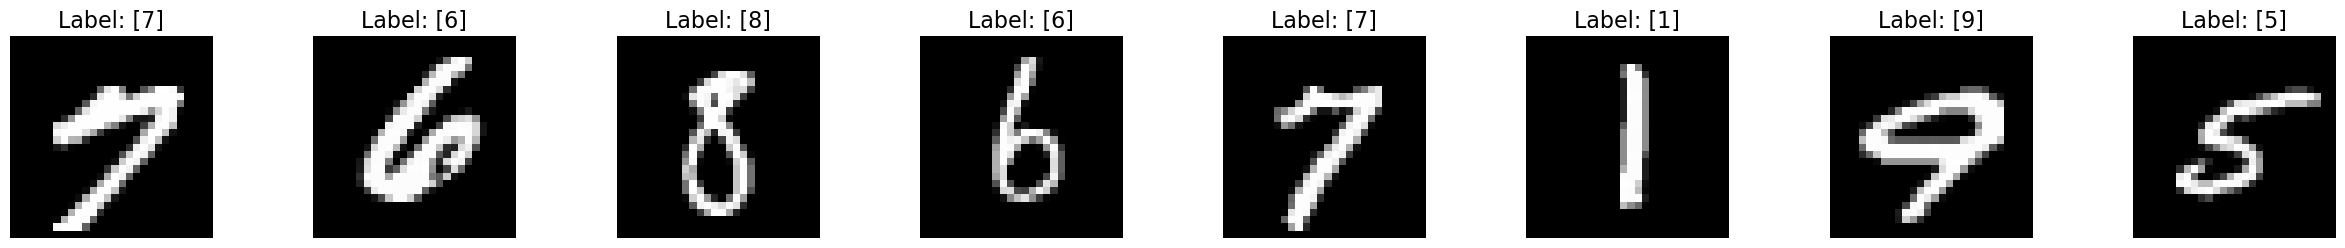

In [197]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=8):
    fig, axes = plt.subplots(1, num_images, figsize=(30, 30))
    axes = axes.ravel()

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}", fontsize=16)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Display first 10 filtered images from the training set
display_images(muestra_array1, muestra_array2)
plt.show()

In [109]:
#muestra_array2 = muestra_array2.reshape(1,-1)
print(muestra_array1.shape)
print(muestra_array2.shape)

(1000, 784)
(1000, 1)


In [146]:
%run frontera_v4.ipynb
frontera = Frontera(muestra_array1,muestra_array2,percentil_min=0, percentil_max=20)

In [147]:
vec, lab = frontera.frontier()

med_std:  0.00038071222866744453 68.52820116014001


In [148]:
frontera.dic_categorias.get('X_0').shape

(97, 784)

In [149]:
frontera.dic_min_dst.get('X_0_with_X_1').shape

(19, 784)

In [150]:
frontera.Frontier_Point_A_X.get('FrontPoints:(0,X)').shape

(171, 784)

In [151]:
frontera.Frontier_Point.get('Frontier:(0,X)').shape

(3, 784)

In [152]:
frontera.Frontier_Point.get('Frontier: ALL').shape

(22, 784)

In [153]:
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
lab

[0, 0, 0, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9]

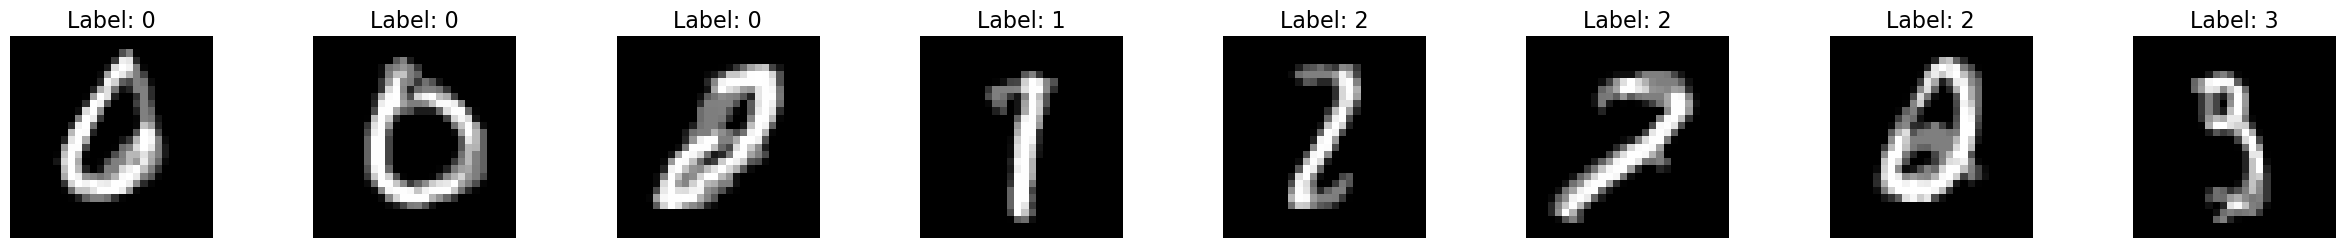

In [199]:
display_images(vec[0:8], lab[0:8],num_images=8)
plt.show()

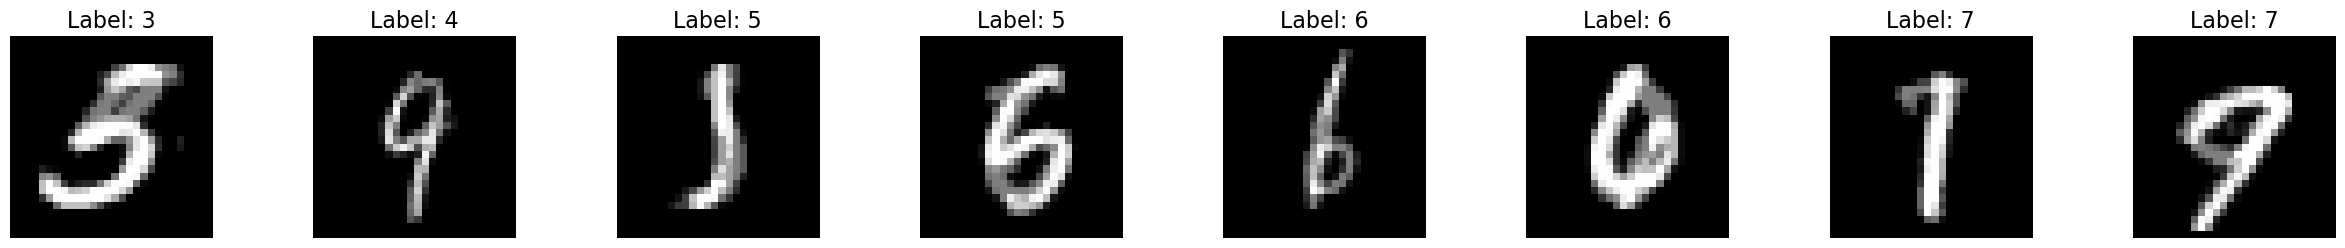

In [200]:
display_images(vec[8:16], lab[8:16],num_images=8)
plt.show()

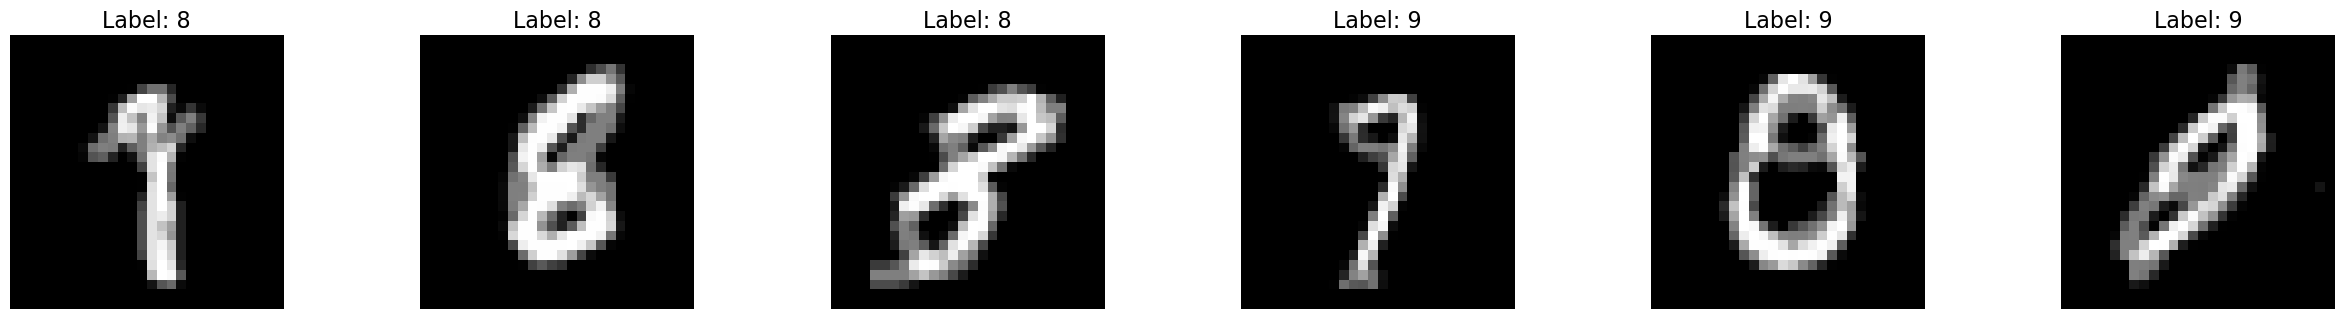

In [201]:
display_images(vec[16:], lab[16:],num_images=6)
plt.show()

In [154]:
# Obtener las imágenes originales
original_images = vec.reshape((22, 28, 28))

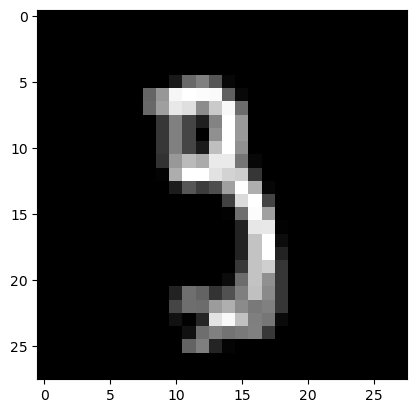

In [169]:
# Obtener el índice de la imagen a graficar
index = 0  # Cambia esto según el índice que desees graficar

# Obtener la imagen correspondiente al índice seleccionado
image = original_images[index]

# Graficar la imagen
plt.imshow(image, cmap='gray')
plt.show()

In [195]:
frontera.plot_muestra_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_frontera_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_UMAP()

## IRIS

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [22]:
# Cargar el dataset de iris
iris = load_iris()

# Obtener las características (X) como una matriz NumPy
X = iris.data

# Obtener las etiquetas (y) como una matriz NumPy
y = iris.target

In [3]:
# Imprimir las formas de las matrices
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (150, 4)
Forma de y: (150,)


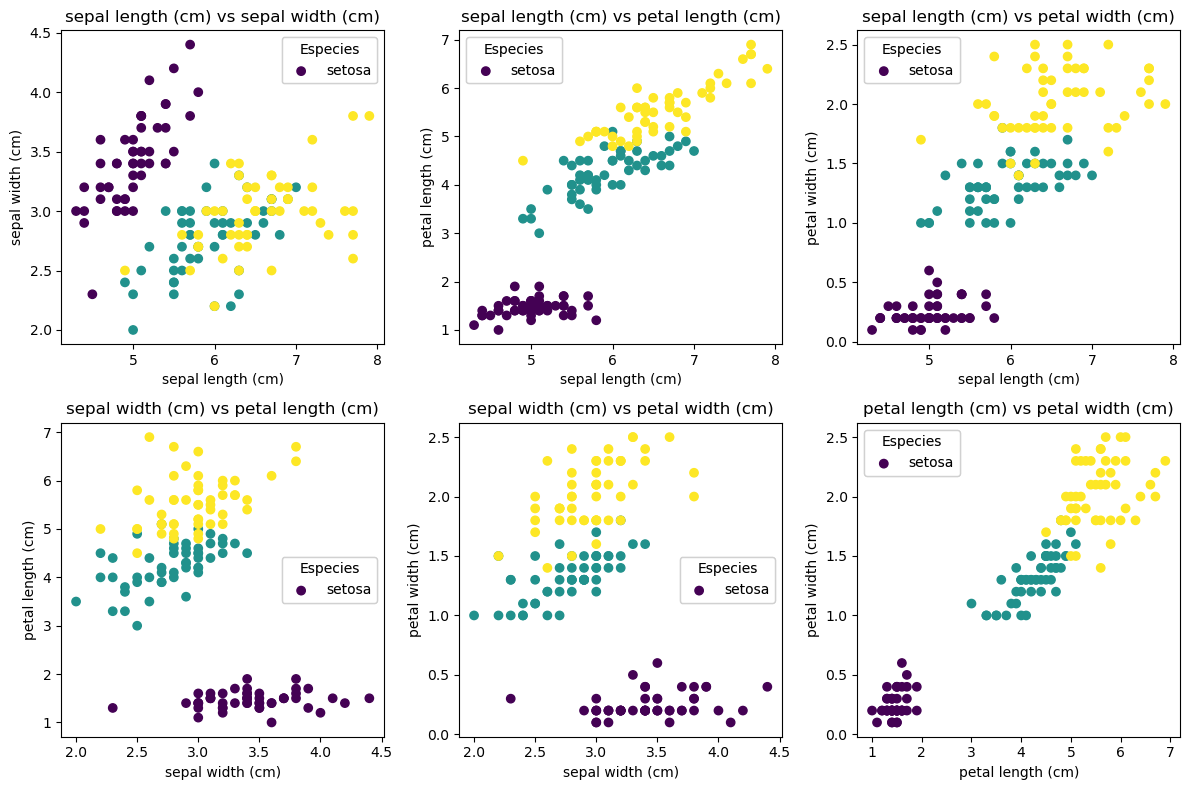

In [19]:
# Crear un diagrama de dispersión para cada par de características usando subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Índices de las características
feature_indices = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Pintar los scatter plots en los subplots correspondientes
for i, (x_index, y_index) in enumerate(feature_indices):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, x_index], X[:, y_index], c=y, cmap='viridis')
    ax.set_xlabel(iris.feature_names[x_index])
    ax.set_ylabel(iris.feature_names[y_index])
    ax.set_title(f"{iris.feature_names[x_index]} vs {iris.feature_names[y_index]}")
    legend = ax.legend(iris.target_names, title="Especies")
    ax.add_artist(legend)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los scatter plots
plt.show()

In [6]:
# Entrenar un árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Obtener la importancia de las características
importance = clf.feature_importances_

# Imprimir la importancia de las características
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {importance[i]}")

sepal length (cm): 0.0
sepal width (cm): 0.013333333333333329
petal length (cm): 0.06405595813204505
petal width (cm): 0.9226107085346216


In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
%run frontera_v4.ipynb

frontera = Frontera(X,y) #,percentil_min=5, percentil_max=20, N_points_frontera=41)
frontera.frontier()

med_std:  0.2329529735786203 41931.53524415165


(array([[5.55, 3.  , 2.6 , 0.6 ],
        [5.  , 2.5 , 2.55, 0.6 ],
        [5.  , 2.9 , 2.75, 0.8 ],
        [5.5 , 3.45, 2.9 , 0.85],
        [5.85, 3.2 , 3.2 , 1.  ],
        [6.3 , 2.6 , 4.9 , 1.65],
        [5.9 , 3.1 , 4.95, 1.8 ],
        [5.05, 2.6 , 4.2 , 1.55],
        [5.6 , 2.9 , 4.5 , 1.65],
        [5.25, 3.  , 2.7 , 0.6 ],
        [5.  , 2.5 , 2.55, 0.6 ],
        [5.75, 3.25, 2.8 , 0.75],
        [6.  , 3.1 , 4.85, 1.8 ],
        [6.3 , 2.6 , 4.9 , 1.65],
        [4.85, 2.95, 3.2 , 0.95]]),
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2])

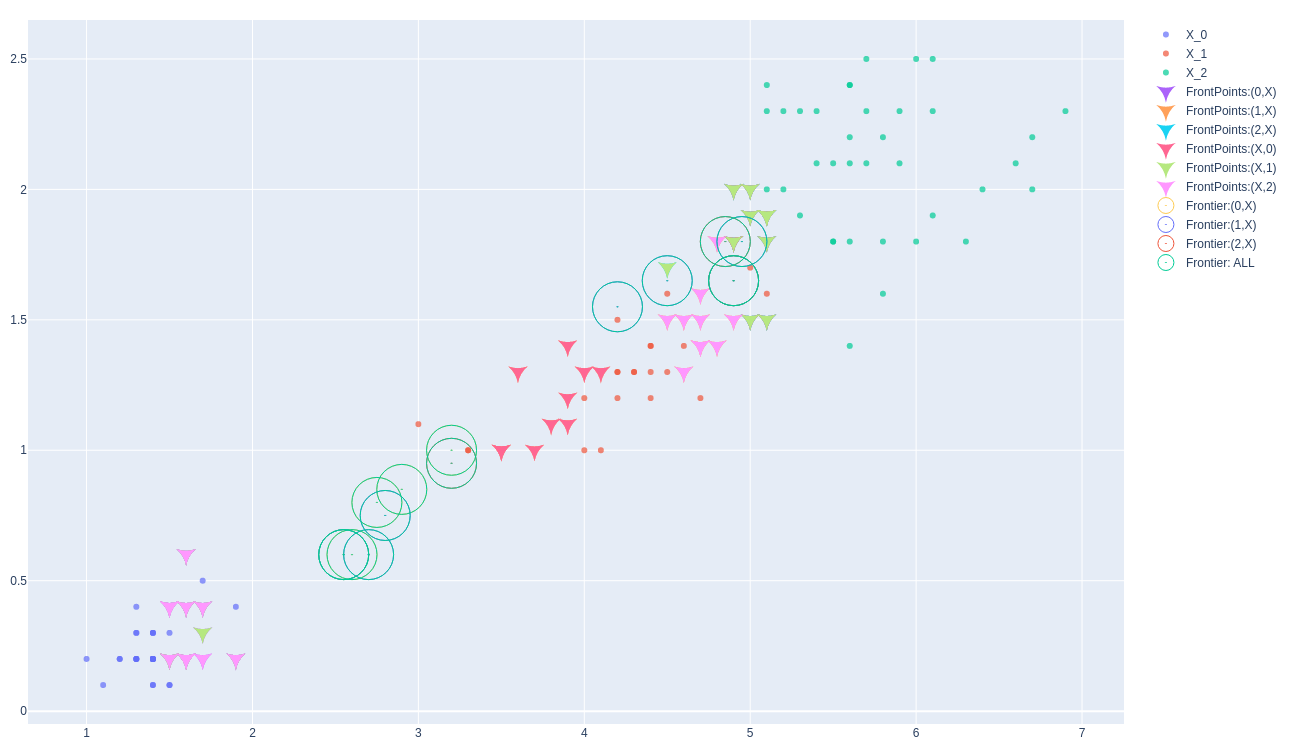

In [31]:
frontera.plot_frontera_2D(2,3)

### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()